# **Análisis Exploratorio de Datos (EDA) para el Proyecto Yelp**

El Análisis Exploratorio de Datos (EDA) es el proceso de explorar y comprender los datos antes de realizar análisis más avanzados. En este Jupyter notebook, realizaremos un EDA para los conjuntos de datos relacionados con Yelp, con el objetivo de identificar problemas potenciales y comprender mejor la estructura de los datos. A continuación se describen los pasos que seguiremos:

---

### **1. Exploración Inicial**
- **1.1. Carga del Archivo**: Cargaremos cada archivo en un DataFrame de pandas.
- **1.2. Dimensiones del DataFrame**: Determinaremos cuántas filas y columnas tiene cada DataFrame.
- **1.3. Tipos de Datos**: Revisaremos los tipos de datos para cada columna.
- **1.4. Muestra Rápida**: Observaremos las primeras y últimas filas para tener una idea general del contenido del DataFrame.



### **2. Análisis de Datos Cualitativos**
- **2.1. Valores Nulos**: Identificaremos columnas con valores faltantes y cuántos valores nulos hay.
- **2.2. Estadísticas Básicas**: Utilizaremos `describe()` para obtener estadísticas como media, mediana, desviación estándar, etc.
- **2.3. Valores Únicos**: Contaremos cuántos valores únicos hay en cada columna para entender su diversidad.



### **3. Análisis de Datos Cuantitativos**
- **3.1. Distribuciones**: Crearemos histogramas para visualizar la distribución de las columnas numéricas.
- **3.2. Correlaciones**: Analizaremos las correlaciones entre columnas numéricas para encontrar relaciones significativas.
- **3.3. Detección de Outliers**: Usaremos gráficos como boxplots para detectar valores atípicos.



### **4. Análisis de Datos Categóricos**
- **4.1. Distribución de Categorías**: Verificaremos la frecuencia de las categorías para entender su diversidad.
- **4.2. Relaciones entre Categorías**: Usaremos gráficos de barras para ver cómo se relacionan las categorías con otras variables.



### **5. Preguntas Clave**
- **5.1. Columnas Importantes**: Identificaremos las columnas más relevantes para el análisis futuro.
- **5.2. Patrones y Tendencias**: Buscaremos patrones o tendencias útiles para el análisis posterior.
- **5.3. Correlaciones**: Exploraremos correlaciones entre columnas para identificar relaciones significativas.

---

Al final de este EDA, esperamos tener una comprensión clara de nuestros datos, permitiéndonos planificar y ejecutar análisis más avanzados. Este proceso establecerá una base sólida para el resto del proyecto y asegurará que estamos trabajando con datos limpios y consistentes.

---

**IMPORTAMOS LIBRERÍAS**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow
import fastparquet
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk 
nltk.download('vader_lexicon')
from concurrent.futures import ThreadPoolExecutor

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pocal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### **1. Exploración Inicial**

Como los archivos de estados son muchos, voy a dividir los estados en tres secciones con 4 estados de muestra cada uno 

In [3]:
#Lista de rutas:
Rutas_Oeste = ['Estados_Concatenados/Alaska.parquet','Estados_Concatenados/Oregon.parquet','Estados_Concatenados/Washington.parquet','Estados_Concatenados/California.parquet']

# Carga de los archivos:
dataframes = [pd.read_parquet(ruta, engine='pyarrow') for ruta in Rutas_Oeste]
Oeste = pd.concat(dataframes,ignore_index=True) # tiempo aproximado de carga 10s          | 452.5+ MB
Oeste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7413535 entries, 0 to 7413534
Data columns (total 8 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   user_id  object
 1   name     object
 2   time     int64 
 3   rating   int64 
 4   text     object
 5   pics     object
 6   resp     object
 7   gmap_id  object
dtypes: int64(2), object(6)
memory usage: 452.5+ MB


In [4]:
#Lista de rutas:
Rutas_Este = ['Estados_Concatenados/Florida.parquet','Estados_Concatenados/Virginia.parquet','Estados_Concatenados/New_York.parquet','Estados_Concatenados/Connecticut.parquet']

#Carga de los archivos:
dataframes = [pd.read_parquet(ruta,engine='pyarrow')for ruta in Rutas_Este]
Este = pd.concat(dataframes,ignore_index=True) # tiempo aproximado de carga 20s          | 603.8+MB
Este.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9892166 entries, 0 to 9892165
Data columns (total 8 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   user_id  object
 1   name     object
 2   time     int64 
 3   rating   int64 
 4   text     object
 5   pics     object
 6   resp     object
 7   gmap_id  object
dtypes: int64(2), object(6)
memory usage: 603.8+ MB


In [5]:
#Lista de rutas: 
Rutas_Centro = ['Estados_Concatenados/Texas.parquet','Estados_Concatenados/Oklahoma.parquet','Estados_Concatenados/Kansas.parquet','Estados_Concatenados/Nebraska.parquet']
#Carga de datos: 
dataframes = [pd.read_parquet(ruta,engine='pyarrow')for ruta in Rutas_Centro]
Centro = pd.concat(dataframes,ignore_index=True)
Centro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7714690 entries, 0 to 7714689
Data columns (total 8 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   user_id  object
 1   name     object
 2   time     int64 
 3   rating   int64 
 4   text     object
 5   pics     object
 6   resp     object
 7   gmap_id  object
dtypes: int64(2), object(6)
memory usage: 470.9+ MB


Tomamos una muestra de los datos para optimizar los tiempos de procesamiento

In [6]:
# Tomar una muestra aleatoria de los dataframe
Oeste_Muestra = Oeste.sample(frac=0.1,random_state=42)
Centro_Muestra = Centro.sample(frac=0.1,random_state=42)
Este_Muestra = Este.sample(frac=0.1,random_state=42)

# Dimensiones de la muestra:
print("Dimensiones Oeste Muestra: ",Oeste_Muestra.shape)
print("Dimensiones Centro Muestra: ", Centro_Muestra.shape)
print("Dimensiones Este Muestra: ", Este_Muestra.shape)

Dimensiones Oeste Muestra:  (741354, 8)
Dimensiones Centro Muestra:  (771469, 8)
Dimensiones Este Muestra:  (989217, 8)


In [7]:
# Tipos de datos
print("Tipos de datos Oeste: ", Oeste_Muestra.dtypes)
print("Tipos de datos Centro: ", Centro_Muestra.dtypes)
print("Tipos de datos Este: ", Este_Muestra.dtypes)


Tipos de datos Oeste:  user_id    object
name       object
time        int64
rating      int64
text       object
pics       object
resp       object
gmap_id    object
dtype: object
Tipos de datos Centro:  user_id    object
name       object
time        int64
rating      int64
text       object
pics       object
resp       object
gmap_id    object
dtype: object
Tipos de datos Este:  user_id    object
name       object
time        int64
rating      int64
text       object
pics       object
resp       object
gmap_id    object
dtype: object


In [8]:
Oeste_Muestra['time'] = pd.to_datetime(Oeste_Muestra['time'],unit='ms')
Oeste_Muestra.head(3)
Oeste_Muestra.info()

<class 'pandas.core.frame.DataFrame'>
Index: 741354 entries, 3102115 to 4038220
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   user_id  741354 non-null  object        
 1   name     741354 non-null  object        
 2   time     741354 non-null  datetime64[ns]
 3   rating   741354 non-null  int64         
 4   text     432315 non-null  object        
 5   pics     27102 non-null   object        
 6   resp     78558 non-null   object        
 7   gmap_id  741354 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 50.9+ MB


In [9]:
Oeste_Muestra.sort_values(by='time',ascending=False)

,user_id,name,time,rating,text,pics,resp,gmap_id
2774910,101794348782317177434,albert yaunkunks,2021-09-09 08:54:30.011,5,Loved it.\nAl,None,None,0x548fde3d51aedf1d:0xcfbb2a64ea94d593
250,103655755742322578001,John Deal,2021-09-08 20:08:31.388,3,It's a market,None,None,0x56c8992b5dee7225:0x9f7f4bf151868cf7
4719234,110552176677867781913,Ellen J,2021-09-08 16:38:42.681,3,Good experience for me & my husband. We enjoye...,[{'url': ['https://lh5.googleusercontent.com/p...,None,0x809adb448f2c73a7:0x5289a6e6cba08aca
4733177,110552176677867781913,Ellen J,2021-09-08 16:38:42.681,3,Good experience for me & my husband. We enjoye...,[{'url': ['https://lh5.googleusercontent.com/p...,None,0x809adb448f2c73a7:0x5289a6e6cba08aca
4727559,108991065180163263658,imuserable,2021-09-08 05:17:31.652,1,My first and last massage at this place period...,None,None,0x809adee9ac6f1bd7:0xe2e56d16919b9b8d
...,...,...,...,...,...,...,...,...
7279492,107323546678721398910,Jonathan Alder,2005-01-01 00:00:00.000,2,None,None,None,0x80c2bf23d56cd159:0x12656fdd42ebefe6
6950187,115473518452659214349,richard meister,2004-04-11 00:00:00.000,4,always great,None,None,0x80c29947e0829181:0x980ae8b881206630
4834916,110556455092787559160,helene landau,2004-04-07 00:00:00.000,3,None,None,None,0x80c2c7b49b13da53:0x4711c6fcf8cd32e2
6130922,116797006494179488573,Mary Alice King,2004-03-22 00:00:00.000,4,the russian pastrami sandwich is out of this w...,None,None,0x80c2c79f65c05a3f:0x36ae812febfdc501


In [10]:
Centro_Muestra['time'] = pd.to_datetime(Centro_Muestra['time'],unit='ms')
Centro_Muestra.head(3)

,user_id,name,time,rating,text,pics,resp,gmap_id
5732205,116852290224981088288,John Fiebich,2019-07-14 19:55:42.915,5,Delicious cookies. Beautiful place to stroll,None,None,0x87bb1b1047db7bcd:0xa3fb40794c912b38
2631848,111703188442332450080,Cynthia Wells,2021-02-04 01:44:28.734,5,None,None,None,0x87b68d21739267eb:0x6fc3103ce8cbc964
502855,100407099118701210615,Chris Hartt,2018-01-02 15:49:06.622,4,None,None,None,0x8640db46fc6ce02b:0x7b7a0aa48bb83bcf


In [11]:
Este_Muestra['time'] = pd.to_datetime(Este_Muestra['time'],unit='ms')
Este_Muestra.head(3)


,user_id,name,time,rating,text,pics,resp,gmap_id
1807676,117587962947559264599,Gary Couillard,2017-10-22 23:36:25.853,5,The high end pawn shop.great inventory,None,"{'text': 'Hello Gary, We do have quite an inv...",0x88e6da2632308759:0x6aa0f7be80d68028
2619079,114866851807691724575,Eugene Quindlen,2016-02-21 18:03:14.008,5,Always a good spot for breakfast.,None,None,0x88dae19b550d85bb:0xcedf13fa3e6f40f6
3642439,101202408656177136263,dark saint,2019-09-30 21:34:33.379,4,Good gym but not the best price,None,None,0x884deee2c0d78c9d:0x1c0ce7dfb8101e83


### **2. Análisis de Datos Cualitativos**

In [12]:
# Conteo de valores nulos
print('Oeste: ',Oeste_Muestra.isnull().sum())
print('Centro: ',Centro_Muestra.isnull().sum())
print('Este: ',Este_Muestra.isnull().sum())

Oeste:  user_id         0
name            0
time            0
rating          0
text       309039
pics       714252
resp       662796
gmap_id         0
dtype: int64
Centro:  user_id         0
name            0
time            0
rating          0
text       340142
pics       753764
resp       668073
gmap_id         0
dtype: int64
Este:  user_id         0
name            0
time            0
rating          0
text       422141
pics       956819
resp       869030
gmap_id         0
dtype: int64


In [13]:
# Estadísticas Básicas
Oeste_Muestra.describe()

,time,rating
count,741354,741354.000000
mean,2019-02-19 14:20:20.465847296,4.322324
min,2003-03-27 00:00:00,1.000000
25%,2018-04-13 07:56:55.110500096,4.000000
50%,2019-04-02 21:56:36.542500096,5.000000
75%,2020-01-28 22:57:56.987250176,5.000000
max,2021-09-09 08:54:30.011000,5.000000
std,NaN,1.092787


In [14]:
Centro_Muestra.describe()

,time,rating
count,771469,771469.000000
mean,2019-03-24 03:35:13.766710016,4.275709
min,2007-08-11 02:15:41.718000,1.000000
25%,2018-05-14 17:32:31.888000,4.000000
50%,2019-04-21 23:37:34.091000064,5.000000
75%,2020-02-17 07:23:51.711000064,5.000000
max,2021-09-09 04:45:33.683000,5.000000
std,NaN,1.131138


In [15]:
Este_Muestra.describe()

,time,rating
count,989217,989217.000000
mean,2019-03-15 00:23:15.770357760,4.304733
min,1990-12-31 00:00:00,1.000000
25%,2018-05-11 01:59:41.521999872,4.000000
50%,2019-04-16 17:43:43.056999936,5.000000
75%,2020-02-10 05:52:50.591000064,5.000000
max,2021-09-08 21:57:05.019000,5.000000
std,NaN,1.115226


### **3. Análisis de Datos Cuantitativos**

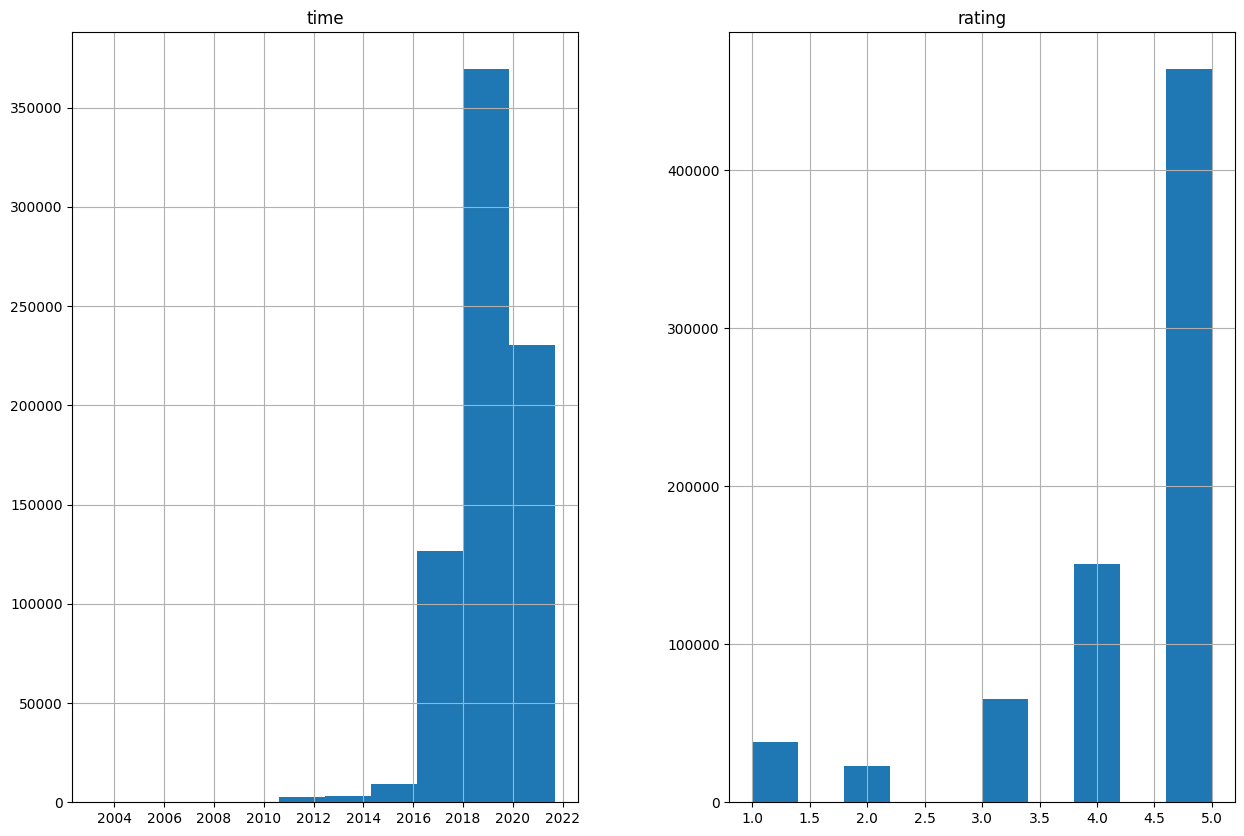

In [16]:
### 3. Análisis de Datos Cuantitativos

#Distribuciones
#Histogramas
Oeste_Muestra.hist(bins=10,figsize=(15,10))
plt.show()

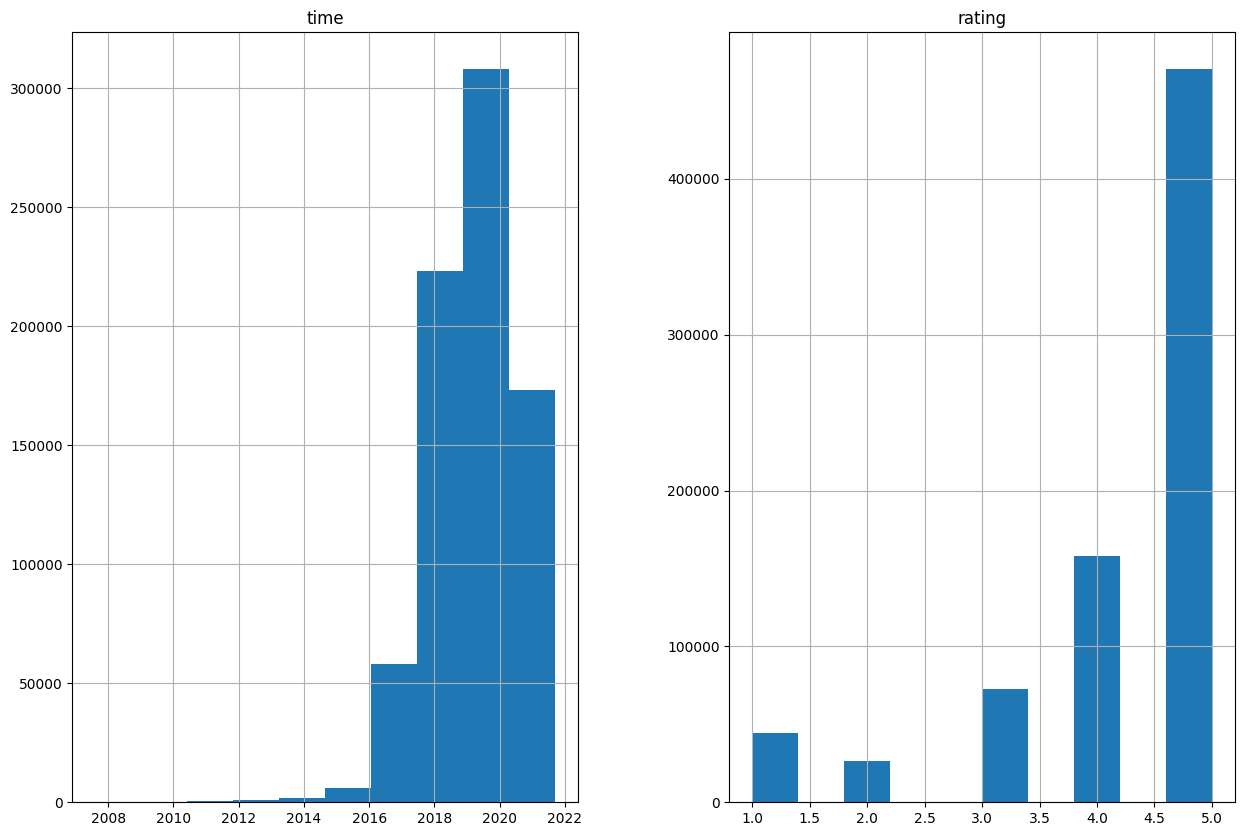

In [17]:
Centro_Muestra.hist(bins=10,figsize=(15,10))
plt.show()

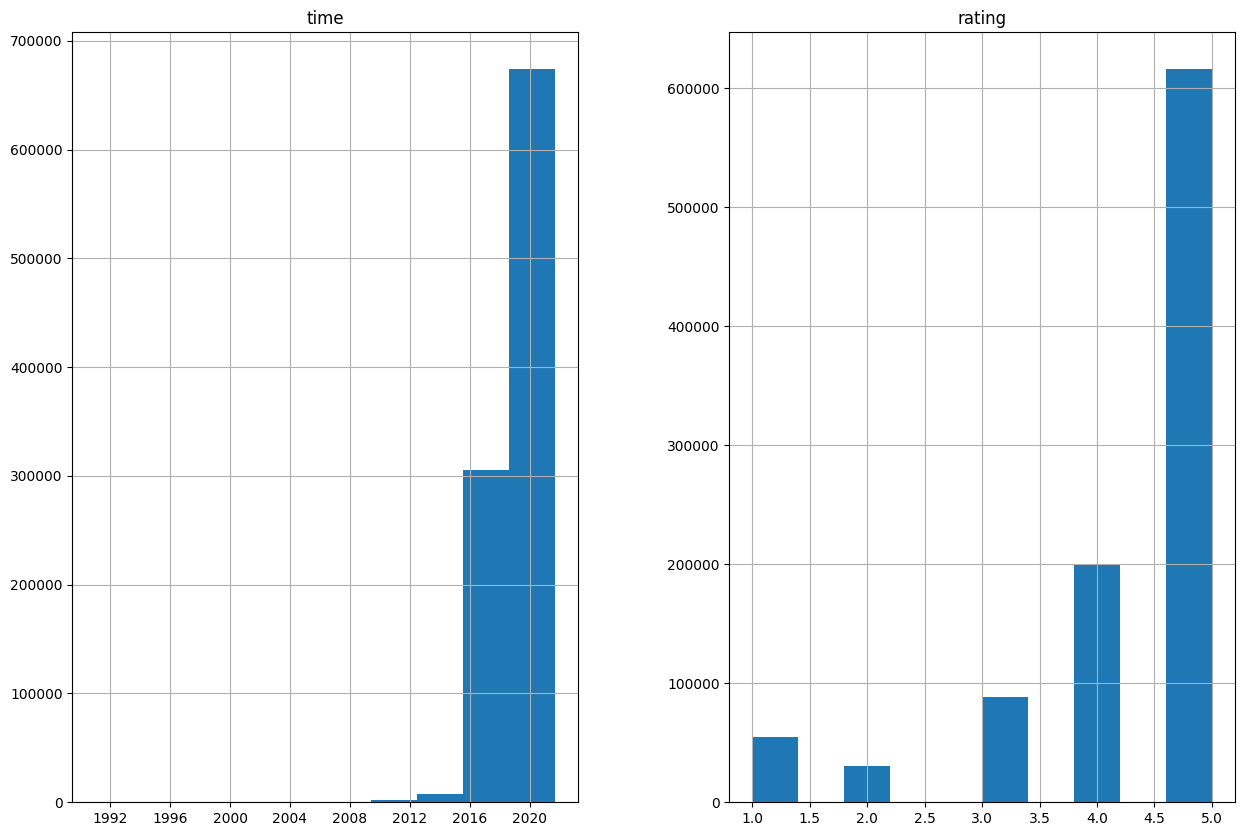

In [18]:
Este_Muestra.hist(bins=10,figsize=(15,10))
plt.show()

In [19]:
sia = SentimentIntensityAnalyzer()  # Inicializa una sola vez

def analizar_sentimiento_vader(texto):
    if texto:
        # Retorna el puntaje de sentimiento (compound)
        return sia.polarity_scores(texto)['compound']
    else:
        return 0

# Si tienes un DataFrame `Oeste_Muestra` con una columna `text`:
# Rellena los valores nulos en la columna `text` con una cadena vacía ''
Oeste_Muestra['text'].fillna('', inplace=True)

# Aplica la función de análisis de sentimiento a la columna `text` utilizando multihilo
with ThreadPoolExecutor() as executor:
    resultados = list(executor.map(analizar_sentimiento_vader, Oeste_Muestra['text']))

# Almacena los resultados en la columna `sentimiento`
Oeste_Muestra['sentimiento'] = resultados

# Muestra las primeras filas del DataFrame con la nueva columna de sentimiento
Oeste_Muestra.head(5)


C:\Users\pocal\AppData\Local\Temp\ipykernel_16860\4189236893.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Oeste_Muestra['text'].fillna('', inplace=True)


,user_id,name,time,rating,text,pics,resp,gmap_id,sentimiento
3102115,112424785181120971072,Eva Baraz,2018-11-20 16:24:15.081,5,,None,"{'text': 'Thank you, Eva. You and your pups a...",0x54906c554dd7d071:0xa53e3072f9eaf56e,0.0000
921866,113139136418368602824,Alex Holley,2020-01-13 01:57:05.767,3,,None,{'text': 'Thanks for leaving a review! If you'...,0x54cf7c6f9b79dbb5:0x2f44ee8c182f0671,0.0000
7040662,101221356706332897323,Mattias Welch,2017-10-29 05:44:22.402,4,,None,None,0x80dbf9577d7c3407:0x303f56a693674be0,0.0000
13345,107337223657596912435,Angelina Sonja,2019-10-03 19:11:13.980,3,,None,None,0x56c897ca54c905d5:0x1bc175a11b510df6,0.0000
2223264,117470025444317624841,Steven Holbrook,2017-09-24 19:47:30.615,4,Very generous portions for the price they charge.,None,None,0x5495a2a74c0ebac5:0xf500b1a1060dcd49,0.5563


In [20]:
sia = SentimentIntensityAnalyzer()  # Inicializa una sola vez

def analizar_sentimiento_vader(texto):
    if texto:
        # Retorna el puntaje de sentimiento (compound)
        return sia.polarity_scores(texto)['compound']
    else:
        return 0

# Si tienes un DataFrame `Oeste_Muestra` con una columna `text`:
# Rellena los valores nulos en la columna `text` con una cadena vacía ''
Centro_Muestra['text'].fillna('', inplace=True)

# Aplica la función de análisis de sentimiento a la columna `text` utilizando multihilo
with ThreadPoolExecutor() as executor:
    resultados = list(executor.map(analizar_sentimiento_vader, Centro_Muestra['text']))

# Almacena los resultados en la columna `sentimiento`
Centro_Muestra['sentimiento'] = resultados

# Muestra las primeras filas del DataFrame con la nueva columna de sentimiento
Centro_Muestra.head(5)

C:\Users\pocal\AppData\Local\Temp\ipykernel_16860\855055586.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Centro_Muestra['text'].fillna('', inplace=True)


,user_id,name,time,rating,text,pics,resp,gmap_id,sentimiento
5732205,116852290224981088288,John Fiebich,2019-07-14 19:55:42.915,5,Delicious cookies. Beautiful place to stroll,None,None,0x87bb1b1047db7bcd:0xa3fb40794c912b38,0.8225
2631848,111703188442332450080,Cynthia Wells,2021-02-04 01:44:28.734,5,,None,None,0x87b68d21739267eb:0x6fc3103ce8cbc964,0.0000
502855,100407099118701210615,Chris Hartt,2018-01-02 15:49:06.622,4,,None,None,0x8640db46fc6ce02b:0x7b7a0aa48bb83bcf,0.0000
2704240,116329163842559257044,Kari kiger,2018-07-16 04:21:58.139,4,,None,None,0x87b69170629a0b61:0xdd3c2593be403b0b,0.0000
3801893,101550322165550375023,Donald Estus Jr.,2021-03-07 02:46:15.066,5,Very helpful and knowledgeable staff. They hav...,None,None,0x87b210d3d782c81b:0xf7d0b8f9978f54d9,0.6232


In [21]:
sia = SentimentIntensityAnalyzer()  # Inicializa una sola vez

def analizar_sentimiento_vader(texto):
    if texto:
        # Retorna el puntaje de sentimiento (compound)
        return sia.polarity_scores(texto)['compound']
    else:
        return 0

# Si tienes un DataFrame `Oeste_Muestra` con una columna `text`:
# Rellena los valores nulos en la columna `text` con una cadena vacía ''
Este_Muestra['text'].fillna('', inplace=True)

# Aplica la función de análisis de sentimiento a la columna `text` utilizando multihilo
with ThreadPoolExecutor() as executor:
    resultados = list(executor.map(analizar_sentimiento_vader, Este_Muestra['text']))

# Almacena los resultados en la columna `sentimiento`
Este_Muestra['sentimiento'] = resultados

# Muestra las primeras filas del DataFrame con la nueva columna de sentimiento
Este_Muestra.head(5)

C:\Users\pocal\AppData\Local\Temp\ipykernel_16860\1390497240.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Este_Muestra['text'].fillna('', inplace=True)


,user_id,name,time,rating,text,pics,resp,gmap_id,sentimiento
1807676,117587962947559264599,Gary Couillard,2017-10-22 23:36:25.853,5,The high end pawn shop.great inventory,None,"{'text': 'Hello Gary, We do have quite an inv...",0x88e6da2632308759:0x6aa0f7be80d68028,0.0000
2619079,114866851807691724575,Eugene Quindlen,2016-02-21 18:03:14.008,5,Always a good spot for breakfast.,None,None,0x88dae19b550d85bb:0xcedf13fa3e6f40f6,0.4404
3642439,101202408656177136263,dark saint,2019-09-30 21:34:33.379,4,Good gym but not the best price,None,None,0x884deee2c0d78c9d:0x1c0ce7dfb8101e83,-0.5577
6586339,101794985347503816479,Frances,2018-08-03 14:18:47.524,5,"Great selection, fresh fruits and vegetables w...",[{'url': ['https://lh5.googleusercontent.com/p...,None,0x89e8bdf6fc38f065:0xdb5f727e8d7640cb,0.9100
1719018,111593613837295524571,Kimberly Slocum,2015-09-12 00:28:21.695,1,This is a review of Sandy Nail Spa. I guess th...,None,None,0x88913faf86d98407:0x773d95ac2f85aafe,0.1926


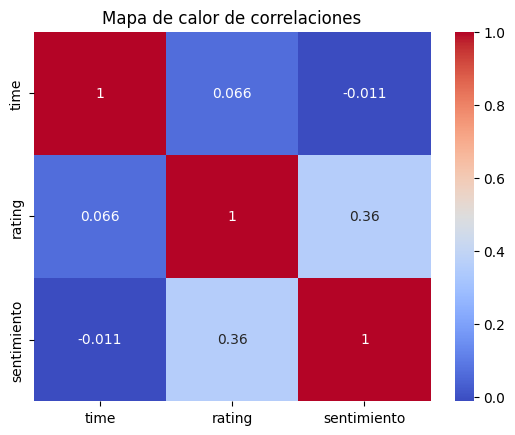

In [23]:
# Correlaciones

#Seleccionamos solo las columnas numéricas
columnas_numericas = Oeste_Muestra.select_dtypes(include=['float','int64','datetime64[ns]'])

#Calcular correlaciones solo las columnas numéricas
correlaciones = columnas_numericas.corr()

#Crear un mapa de calor de las correlaciones
sns.heatmap(correlaciones,annot=True,cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()

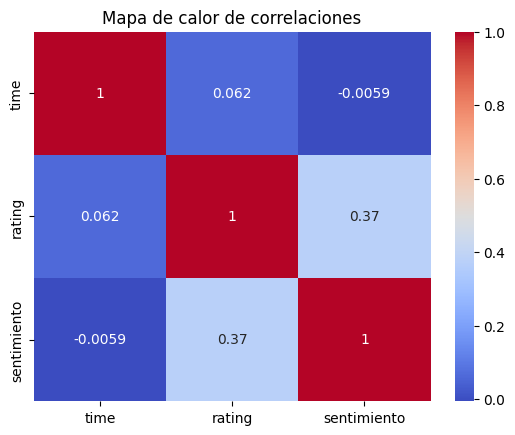

In [24]:
#Seleccionamos solo las columnas numéricas
columnas_numericas = Centro_Muestra.select_dtypes(include=['float','int64','datetime64[ns]'])

#Calcular correlaciones solo las columnas numéricas
correlaciones = columnas_numericas.corr()

#Crear un mapa de calor de las correlaciones
sns.heatmap(correlaciones,annot=True,cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()

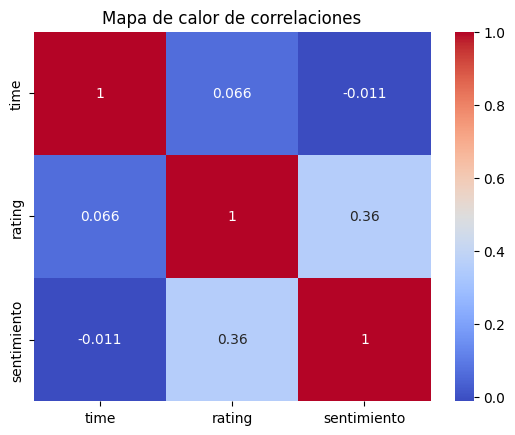

In [25]:
#Seleccionamos solo las columnas numéricas
columnas_numericas = Oeste_Muestra.select_dtypes(include=['float','int64','datetime64[ns]'])

#Calcular correlaciones solo las columnas numéricas
correlaciones = columnas_numericas.corr()

#Crear un mapa de calor de las correlaciones
sns.heatmap(correlaciones,annot=True,cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()

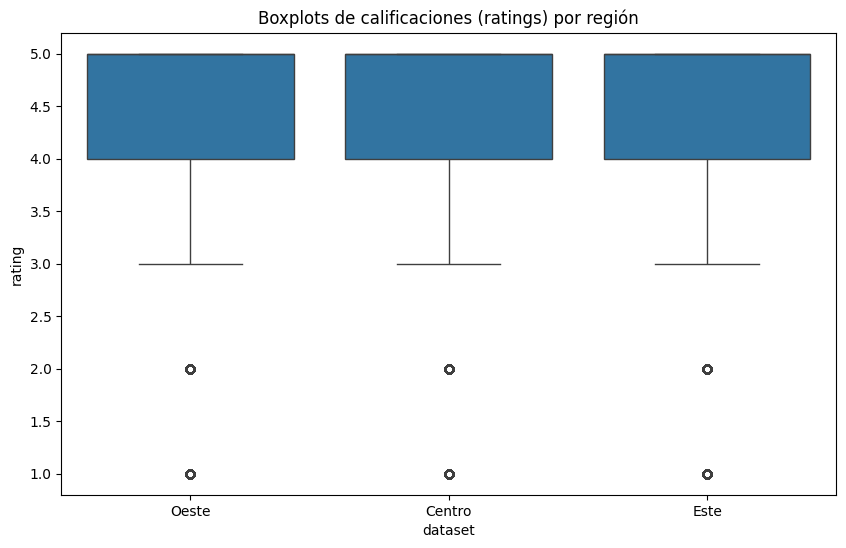

In [27]:
# Combina los datos en un DataFrame
data = {
    'rating': Oeste_Muestra['rating'].tolist() + Centro_Muestra['rating'].tolist() + Este_Muestra['rating'].tolist(),
    'dataset': (['Oeste'] * len(Oeste_Muestra['rating'])) + (['Centro'] * len(Centro_Muestra['rating'])) + (['Este'] * len(Este_Muestra['rating']))
}

df_combined = pd.DataFrame(data)

# Crea el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_combined, x='dataset', y='rating')
plt.title('Boxplots de calificaciones (ratings) por región')
plt.show()

### **4. Análisis de Datos Categóricos**

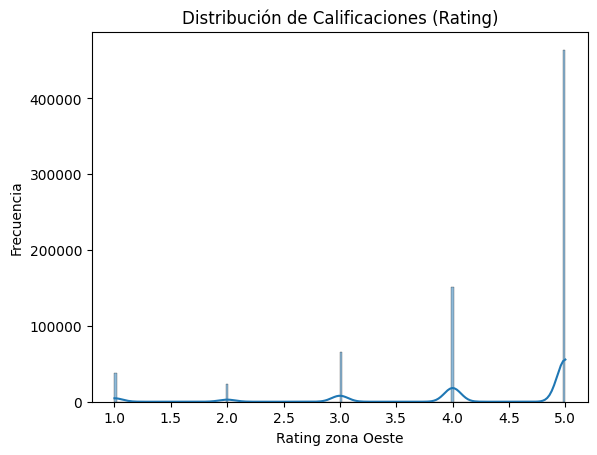

In [34]:
# Histograma para 'Rating'
sns.histplot(Oeste_Muestra['rating'], kde=True)
plt.xlabel("Rating zona Oeste")
plt.ylabel("Frecuencia")
plt.title("Distribución de Calificaciones (Rating)")
plt.show()

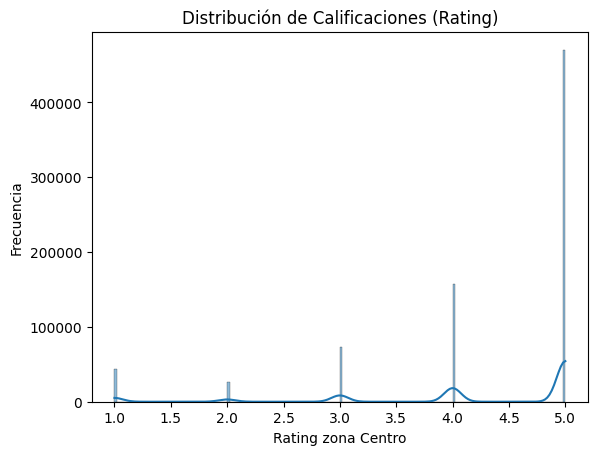

In [33]:
# Histograma para 'Rating'
sns.histplot(Centro_Muestra['rating'], kde=True)
plt.xlabel("Rating zona Centro")
plt.ylabel("Frecuencia")
plt.title("Distribución de Calificaciones (Rating)")
plt.show()

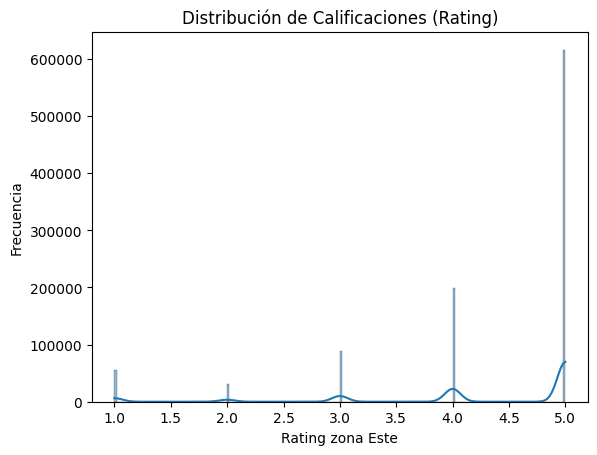

In [32]:
# Histograma para 'Rating'
sns.histplot(Este_Muestra['rating'], kde=True)
plt.xlabel("Rating zona Este")
plt.ylabel("Frecuencia")
plt.title("Distribución de Calificaciones (Rating)")
plt.show()

### **5. Preguntas Clave**
- **5.1. Columnas Importantes**: Identificaremos las columnas más relevantes para el análisis futuro.
- **5.2. Patrones y Tendencias**: Buscaremos patrones o tendencias útiles para el análisis posterior.
- **5.3. Correlaciones**: Exploraremos correlaciones entre columnas para identificar relaciones significativas.